In [1]:
import Pkg

In [2]:
using Pkg
ENV["PYTHON"] ="/scratch/ajulu.c/anaconda3/envs/rms_env/bin/python"
ENV["RMS_ENV"] ="/scratch/ajulu.c/anaconda3/envs/rms_env"
Pkg.add("PyCall")
Pkg.build("PyCall")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
 Resolving package versions...
 Installed PaddedViews ───── v0.5.3
 Installed DocumenterTools ─ v0.1.5
 Installed Contour ───────── v0.5.2
 Installed OffsetArrays ──── v1.0.3
 Installed StatsBase ─────── v0.32.2
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
  [d38c429a] ↑ Contour v0.5.1 ⇒ v0.5.2
  [35a29f4d] ↑ DocumenterTools v0.1.4 ⇒ v0.1.5
  [6fe1bfb0] ↑ OffsetArrays v1.0.2 ⇒ v1.0.3
  [5432bcbf] ↑ PaddedViews v0.5.1 ⇒ v0.5.3
  [2913bbd2] ↑ StatsBase v0.32.1 ⇒ v0.32.2
  Building Conda ─→ `~/.julia/packages/Conda/kLXeC/deps/build.log`
  Building PyCall → `~/.julia/packages/PyCall/ttONZ/deps/build.log`


false

In [3]:
using Pkg
#Pkg.add("ReactionMechanismSimulator") #it has already been added no need to do add again
Pkg.build("ReactionMechanismSimulator")
using DifferentialEquations
using PyPlot
using ReactionMechanismSimulator



  Building SpecialFunctions → `~/.julia/packages/SpecialFunctions/ne2iw/deps/build.log`
  Building Clp ─────────────→ `~/.julia/packages/Clp/IBQzB/deps/build.log`
  Building Conda ───────────→ `~/.julia/packages/Conda/kLXeC/deps/build.log`
  Building PyCall ──────────→ `~/.julia/packages/PyCall/ttONZ/deps/build.log`
  Building FFTW ────────────→ `~/.julia/packages/FFTW/loJ3F/deps/build.log`
  Building Dierckx ─────────→ `~/.julia/packages/Dierckx/9SY4A/deps/build.log`
  Building Sass ────────────→ `~/.julia/packages/Sass/EZMlY/deps/build.log`
  Building Sundials ────────→ `~/.julia/packages/Sundials/CRi5j/deps/build.log`


┌ Info: Recompiling stale cache file /home/ajulu.c/.julia/compiled/v1.2/DifferentialEquations/UQdwS.ji for DifferentialEquations [0c46a032-eb83-5123-abaf-570d42b7fbaa]
└ @ Base loading.jl:1240
  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

┌ Info: Recompiling stale cache file /home/ajulu.c/.julia/compiled/v1.2/ReactionMechanismSimulator/klXCL.ji for ReactionMechanismSimulator [311e5216-15cf-11e9-05d7-a146a2b8c9cd]
└ @ Base loading.jl:1240
┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["

In [5]:
phaseDict = readinput("/scratch/ajulu.c/Code/GTL/pch/rms/chem785.rms")

[13:55:57] WARNING: not removing hydrogen atom without neighbors


Dict{Any,Any} with 1 entry:
  "phase" => Dict{Any,Any}("Species"=>Species[Species{NASA{EmptyThermoUncertain…

In [6]:
spcs = phaseDict["phase"]["Species"]; #mechanism dictionaries index:  phaseDict[phasename]["Species" or "Reactions"]
rxns = phaseDict["phase"]["Reactions"];

In [8]:
ig = IdealGas(spcs,rxns,name="gas"); #Define the phase (how species thermodynamic and kinetic properties calculated)
initialconds = Dict(["T"=>1250.0,"P"=>10e5,"n-pch"=>0.0166,"O2"=>1, "N2"=>3.825, "Ar"=>3.825]); #Set simulation Initial Temp and Pressure
domain,y0 = ConstantTPDomain(phase=ig,initialconds=initialconds;sensitivity=false); #Define the domain (encodes how system thermodynamic properties calculated)

In [9]:
react = Reactor(domain,y0,(0.0,150.1)); #Create the reactor object

In [11]:
sol = solve(react.ode,DifferentialEquations.CVODE_BDF(),abstol=1e-16,reltol=1e-6); #solve the ode associated with the reactor

In [12]:
bsol = Simulation(sol,domain);

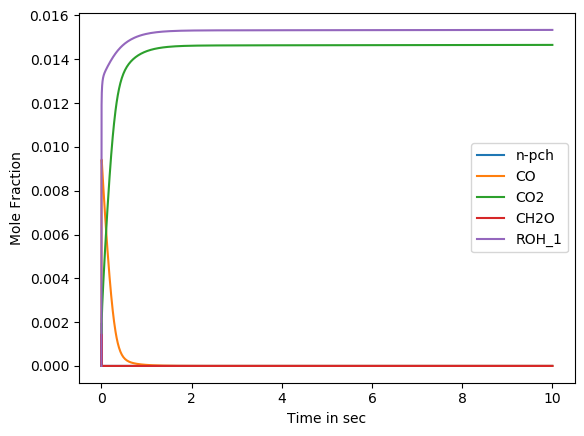

PyObject Text(24.0, 0.5, 'Mole Fraction')

In [19]:
plotmolefractions(bsol,10.0; t0=1e-15, N=1000, tol=0.001, exclude=["O2","Ar","N2"])

┌ Info: Recompiling stale cache file /home/ajulu.c/.julia/compiled/v1.2/ImageMagick/0LbNX.ji for ImageMagick [6218d12a-5da1-5696-b52f-db25d2ecc6d1]
└ @ Base loading.jl:1240


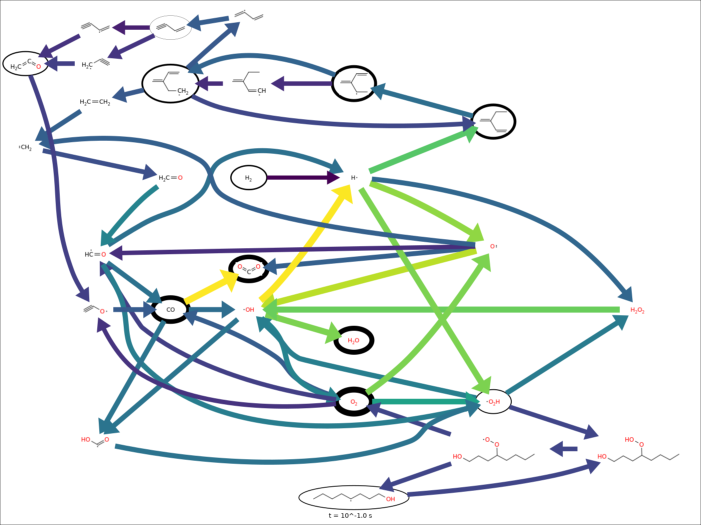

In [20]:
getfluxdiagram(bsol,0.1)